## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
titan=pd.read_csv('titanic.csv')

In [4]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titan.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [126]:
titan['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [127]:
import matplotlib.pyplot as plt
#%matplotlib inline

In [128]:
xpoints=titan['Pclass']
ypoints=titan['Survived']

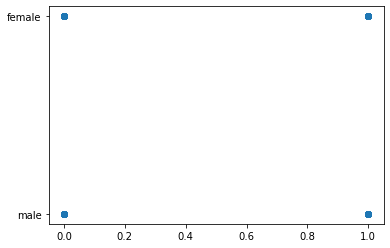

In [129]:
plt.scatter(titan['Survived'],titan['Sex'])

In [130]:
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

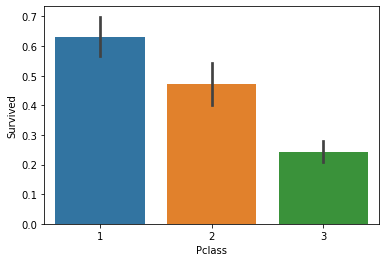

In [131]:
sns.barplot(x = "Pclass", y = "Survived", data = titan)

In [132]:
titan['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Determine if the survival rate is associated to the class of passenger

In [133]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


<AxesSubplot:xlabel='Pclass'>

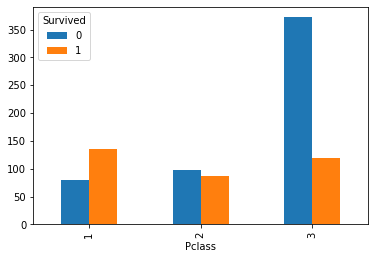

In [134]:
CrosstabResult=pd.crosstab(index=titan['Pclass'],columns=titan['Survived'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
%matplotlib inline 
CrosstabResult.plot.bar()

In [135]:
contigency= pd.crosstab(titan['Pclass'], titan['Survived']) 
contigency

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [136]:
contigency_pct = pd.crosstab(titan['Pclass'], titan['Survived'], normalize='index')
contigency_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [141]:
# Chi-square test of independence. 
chi2, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)
print(chi2)

4.549251711298793e-23
102.88898875696056


In [65]:
### P-valur is less then 0.05, therefore will can reject the null hypothesis that class difference has no relation with whether or not a passager survived,
### which means that very likely sex difference really affect the survival rate.

### Determine if the survival rate is associated to the gender

Survived    0    1
Sex               
female     81  233
male      468  109


<AxesSubplot:xlabel='Sex'>

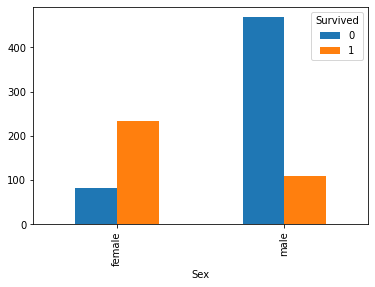

In [117]:
CrosstabResult=pd.crosstab(index=titan['Sex'],columns=titan['Survived'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
%matplotlib inline
CrosstabResult.plot.bar()

In [66]:
contigency= pd.crosstab(titan['Sex'], titan['Survived']) 
contigency

Survived,0,1
Sex,,
female,81,233
male,468,109


In [118]:
contigency_pct = pd.crosstab(titan['Sex'], titan['Survived'], normalize='index')
contigency_pct

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [69]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

1.1973570627755645e-58


In [70]:
### P-valur is less then 0.05, therefore we can reject the null hypothesis that sex difference has no relation with whether or not a passager survived,
### which means that very likely sex difference really affect the survival rate.

### Determine the survival rate is associated to the age

<AxesSubplot:xlabel='Survived', ylabel='Age'>

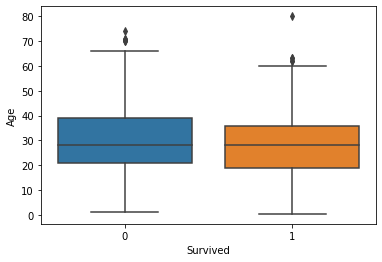

In [72]:
sns.boxplot(x="Survived", y="Age", data=titan)

<AxesSubplot:ylabel='Age'>

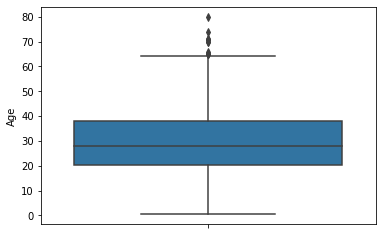

In [86]:
sns.boxplot( y="Age", data=titan)

In [75]:
titan_s=titan[(titan['Survived']==1)]

Text(0.5, 1.0, 'Histogram Plot from Titan for the survived group')

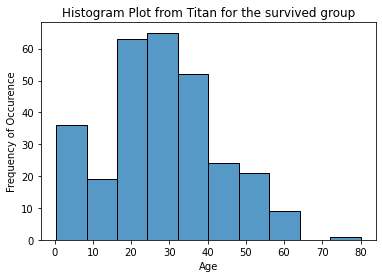

In [95]:
# To remove the curve and increase the bin size to get more detailed histogram
sns.histplot(titan_s['Age'], bins = 10)
# Add labels and title from the matplotlib library
plt.ylabel("Frequency of Occurence")
plt.title("Histogram Plot from Titan for the survived group")

In [84]:
titan_ns=titan[(titan['Survived']==0)]

Text(0.5, 1.0, 'Histogram Plot of Titan for the not-survived group')

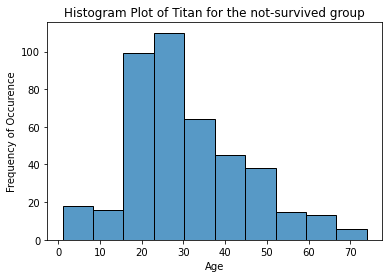

In [96]:
# To remove the curve and increase the bin size to get more detailed histogram
sns.histplot(titan_ns['Age'], bins = 10)
# Add labels and title from the matplotlib library
plt.ylabel("Frequency of Occurence")
plt.title("Histogram Plot of Titan for the not-survived group")

Text(0.5, 1.0, 'Histogram Plot of Titan for all age regardlss of survival')

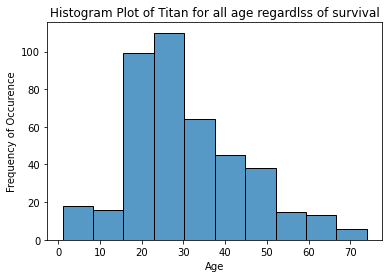

In [99]:
# To remove the curve and increase the bin size to get more detailed histogram
sns.histplot(titan_ns['Age'], bins = 10)
# Add labels and title from the matplotlib library
plt.ylabel("Frequency of Occurence")
plt.title("Histogram Plot of Titan for all age regardlss of survival")

In [142]:
import scipy.stats as stats

In [143]:
titan_droppedna=titan.dropna()

In [144]:
#calculate point-biserial correlation
stats.pointbiserialr(titan_droppedna['Survived'], titan_droppedna['Age'])

PointbiserialrResult(correlation=-0.2540847542030531, pvalue=0.0005189503307882488)

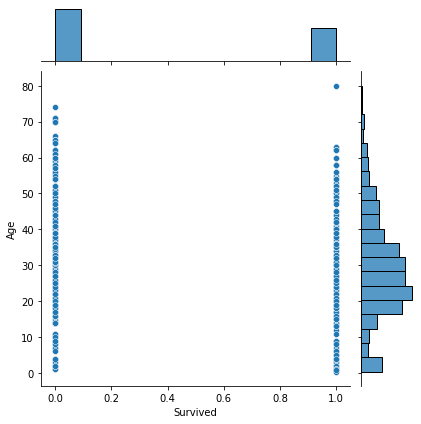

In [145]:
sns.jointplot(x = 'Survived', y ='Age', data = titan, kind = 'scatter')

In [146]:
### Since the correlation coefficient is negative, this indicates that when the variable x(survived) takes on the value “1” that the variable y(age) tends to take on lower values compared to when the variable x takes on the value “0.”
### In other words, smaller age does have a slightly higher chance to survive. 